In [1]:
import pandas as pd
import sklearn
import numpy as np
data = pd.read_csv("./Datasets/Historical/HistoricalData_APPLE.csv",parse_dates=["Date"],index_col="Date")

In [2]:
data.head(10)

Close/Last    Volume      Open     High        Low
Date                                                         
2021-06-09    $127.13  56877940   $127.21  $127.75    $126.52
2021-06-08    $126.74  74403770    $126.6  $128.46  $126.2101
2021-06-07     $125.9  71057550   $126.17  $126.32  $124.8321
2021-06-04    $125.89  75169340   $124.07  $126.16    $123.85
2021-06-03    $123.54  76229170   $124.68  $124.85    $123.13
2021-06-02    $125.06  59278860   $124.28  $125.24    $124.05
2021-06-01    $124.28  67637120   $125.08  $125.35    $123.94
2021-05-28    $124.61  71311110   $125.57   $125.8    $124.55
2021-05-27    $125.28  94625600   $126.44  $127.64    $125.08
2021-05-26    $126.85  56575920  $126.955  $127.39    $126.42

Finding any missing values

In [3]:
missing_val = data.isnull().sum()
missing_val

Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

Replacing '$' values:

In [4]:
data['Close/Last']=data['Close/Last'].str.replace('$',"")
data['Open']=data['Open'].str.replace('$',"")
data['High']=data['High'].str.replace('$',"")
data['Low']=data['Low'].str.replace('$',"")
data.head()

<ipython-input-4-e13957813685>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Close/Last']=data['Close/Last'].str.replace('$',"")
<ipython-input-4-e13957813685>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Open']=data['Open'].str.replace('$',"")
<ipython-input-4-e13957813685>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['High']=data['High'].str.replace('$',"")
<ipython-input-4-e13957813685>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition

Close/Last    Volume    Open    High       Low
Date                                                     
2021-06-09     127.13  56877940  127.21  127.75    126.52
2021-06-08     126.74  74403770   126.6  128.46  126.2101
2021-06-07      125.9  71057550  126.17  126.32  124.8321
2021-06-04     125.89  75169340  124.07  126.16    123.85
2021-06-03     123.54  76229170  124.68  124.85    123.13

In [5]:
data['Close/Last'] = data['Close/Last'].astype(float)
data['Open'] = data['Open'].astype(float)
data['High'] = data['High'].astype(float)
data['Low'] = data['Low'].astype(float)
data.head()

Close/Last    Volume    Open    High       Low
Date                                                      
2021-06-09      127.13  56877940  127.21  127.75  126.5200
2021-06-08      126.74  74403770  126.60  128.46  126.2101
2021-06-07      125.90  71057550  126.17  126.32  124.8321
2021-06-04      125.89  75169340  124.07  126.16  123.8500
2021-06-03      123.54  76229170  124.68  124.85  123.1300

YEARLY DATA:

<AxesSubplot:xlabel='Date', ylabel='Open'>

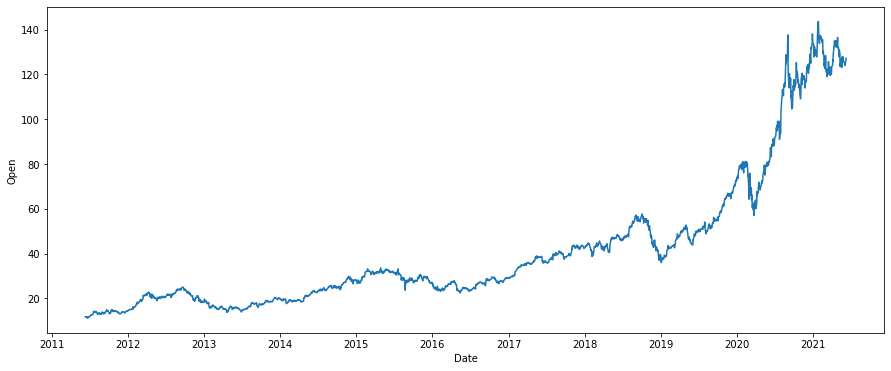

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
sns.lineplot(data=data['Open'])

<AxesSubplot:xlabel='Date', ylabel='Close/Last'>

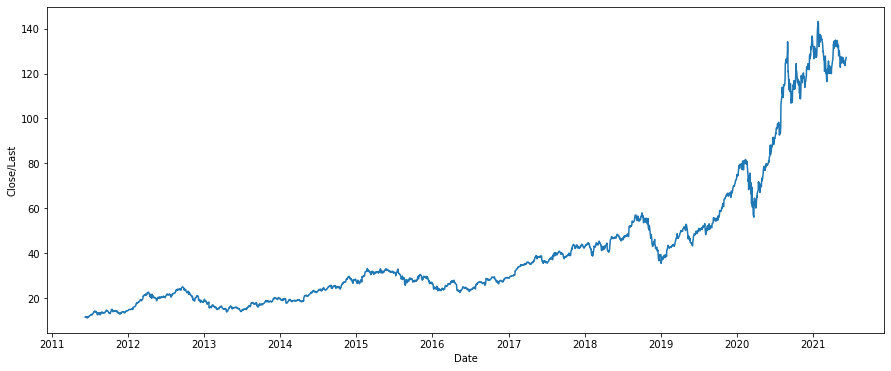

In [7]:
plt.figure(figsize=(15,6))
sns.lineplot(data=data['Close/Last'])

<AxesSubplot:xlabel='Date', ylabel='Low'>

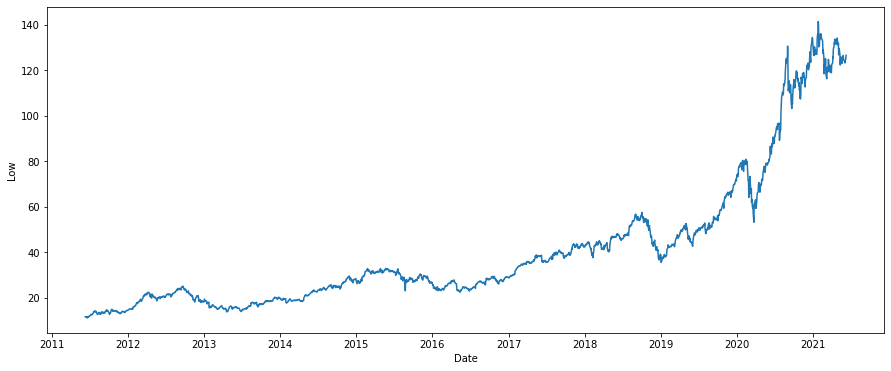

In [8]:
plt.figure(figsize=(15,6))
sns.lineplot(data=data['Low'])

<AxesSubplot:xlabel='Date', ylabel='High'>

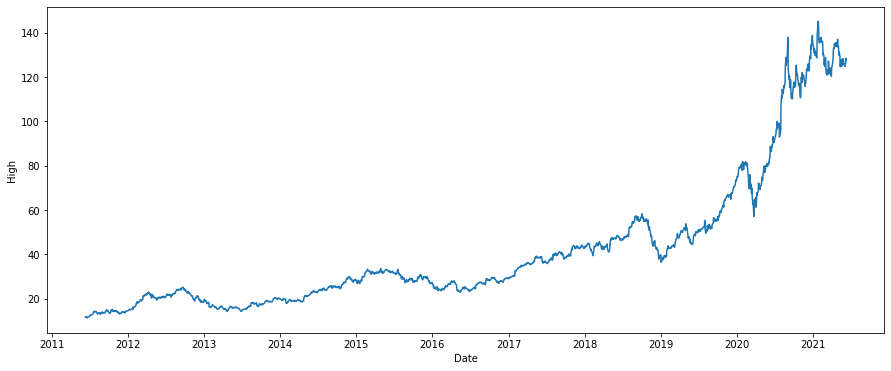

In [9]:
plt.figure(figsize=(15,6))
sns.lineplot(data=data['High'])

<AxesSubplot:xlabel='Date', ylabel='Volume'>

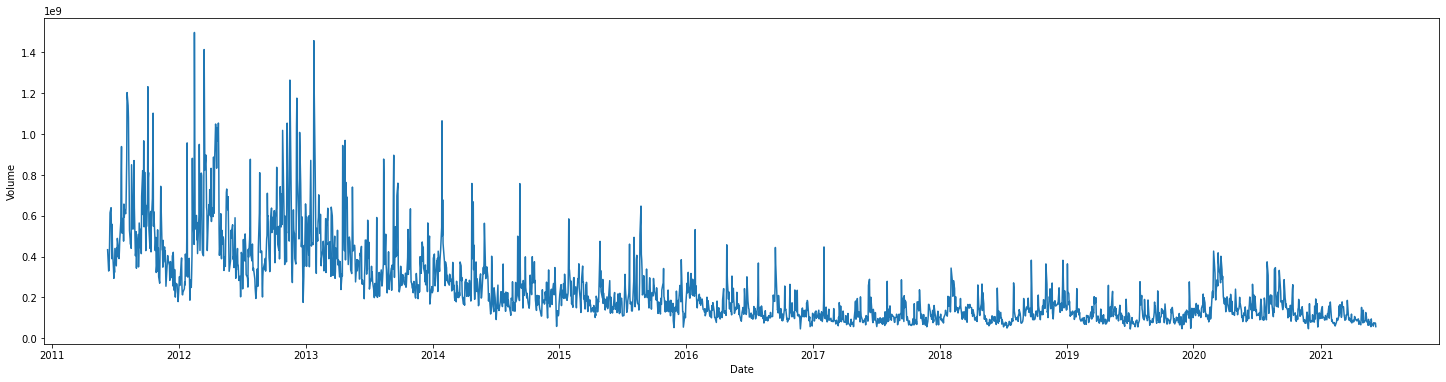

In [10]:
plt.figure(figsize=(25,6))
sns.lineplot(data=data['Volume'])

MONTHLY DATA:

In [11]:
monthly_resampled_data = data.Open.resample('M').mean()
monthly_resampled_data
plt.figure(figsize=(350,50))
sns.barplot(monthly_resampled_data.index.values,monthly_resampled_data)

C:\Users\sidha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Open'>

In [12]:
monthly_resampled_data = data["Close/Last"].resample('M').mean()
monthly_resampled_data
plt.figure(figsize=(350,50))
sns.barplot(monthly_resampled_data.index.values,monthly_resampled_data)

C:\Users\sidha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Close/Last'>

In [13]:
monthly_resampled_data = data.Low.resample('M').mean()
monthly_resampled_data
plt.figure(figsize=(350,50))
sns.barplot(monthly_resampled_data.index.values,monthly_resampled_data)

C:\Users\sidha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Low'>

In [14]:
monthly_resampled_data = data.High.resample('M').mean()
monthly_resampled_data
plt.figure(figsize=(350,50))
sns.barplot(monthly_resampled_data.index.values,monthly_resampled_data)

C:\Users\sidha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='High'>

In [15]:
monthly_resampled_data = data.Volume.resample('M').mean()
monthly_resampled_data
plt.figure(figsize=(350,50))
sns.barplot(monthly_resampled_data.index.values,monthly_resampled_data)

C:\Users\sidha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Volume'>

QUARTERLY DATA:

C:\Users\sidha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Open'>

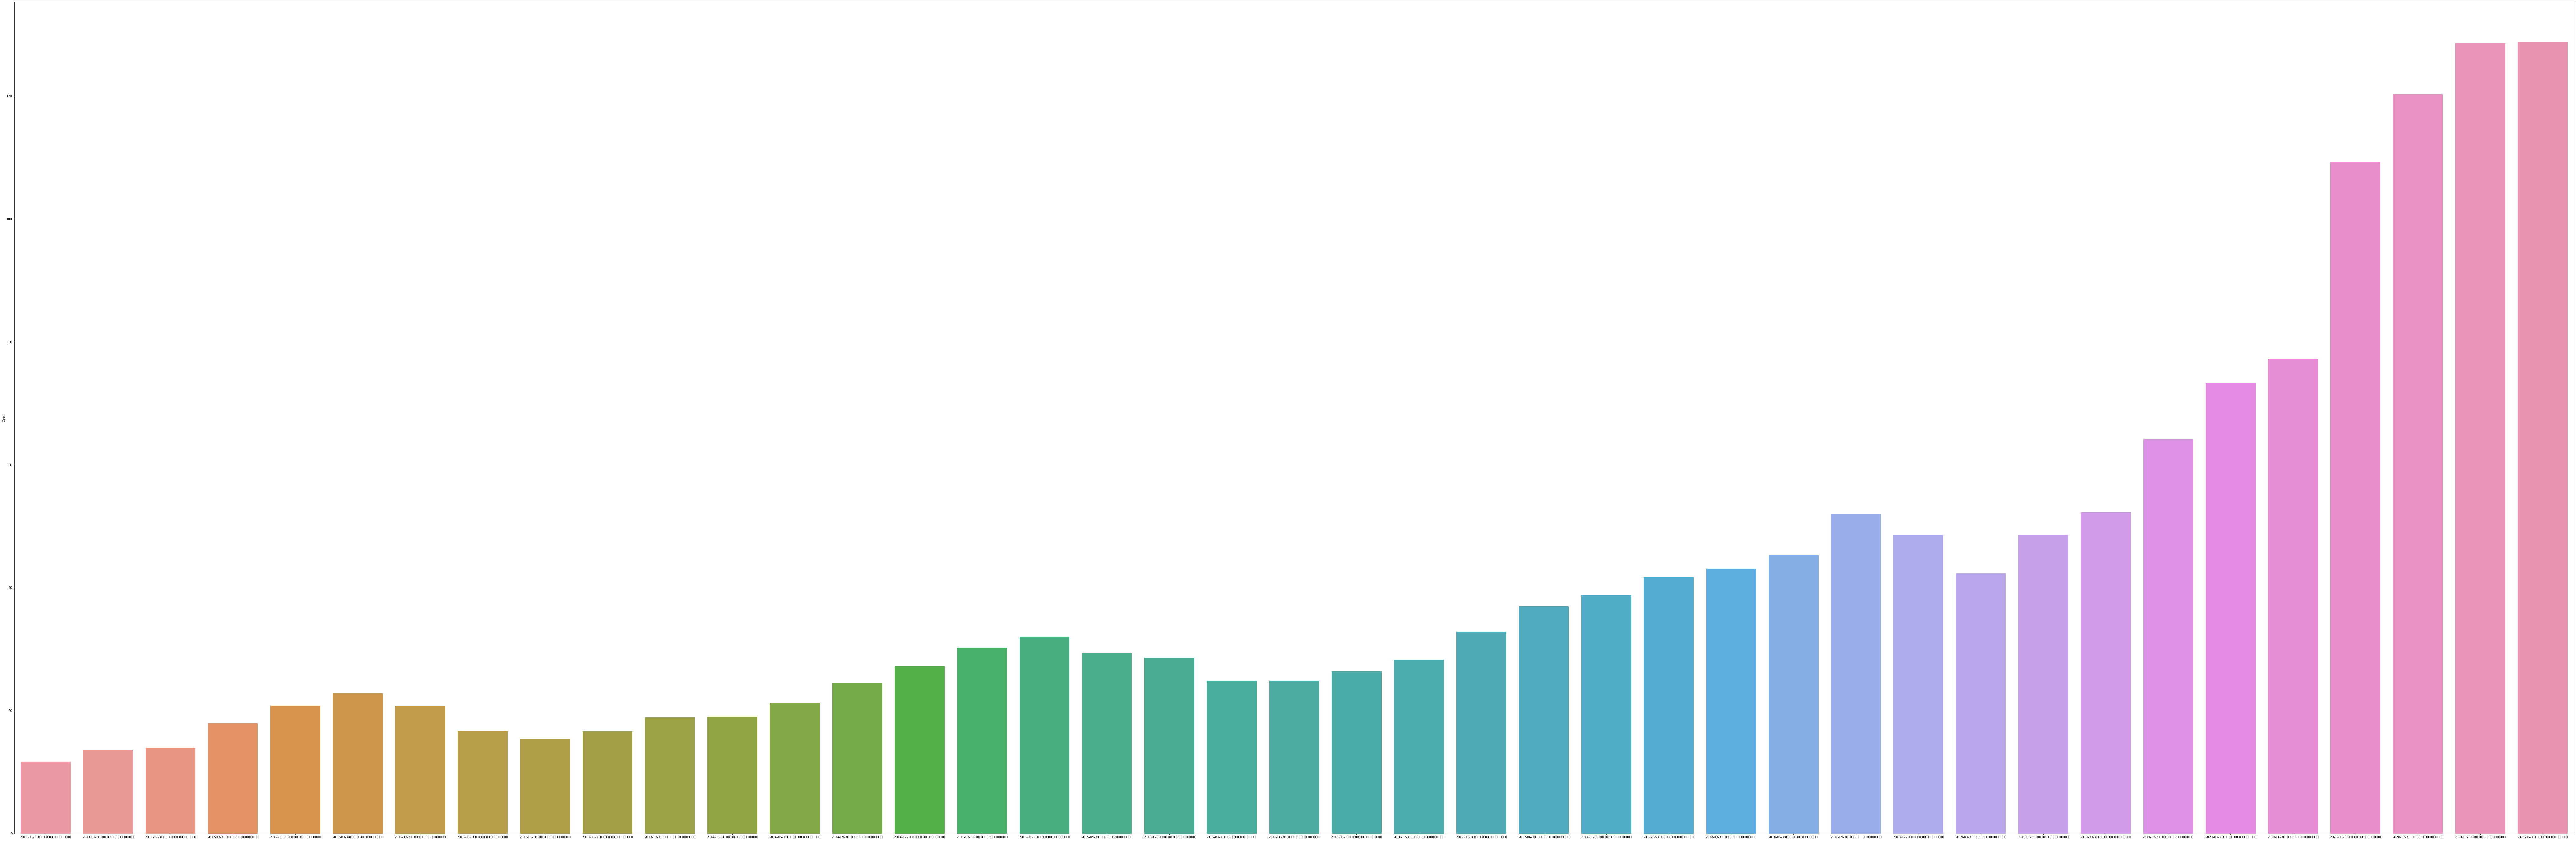

In [16]:
Quarterly_resampled_data = data.Open.resample('Q').mean()
Quarterly_resampled_data
plt.figure(figsize=(150,50))
sns.barplot(Quarterly_resampled_data.index.values,Quarterly_resampled_data)

C:\Users\sidha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Close/Last'>

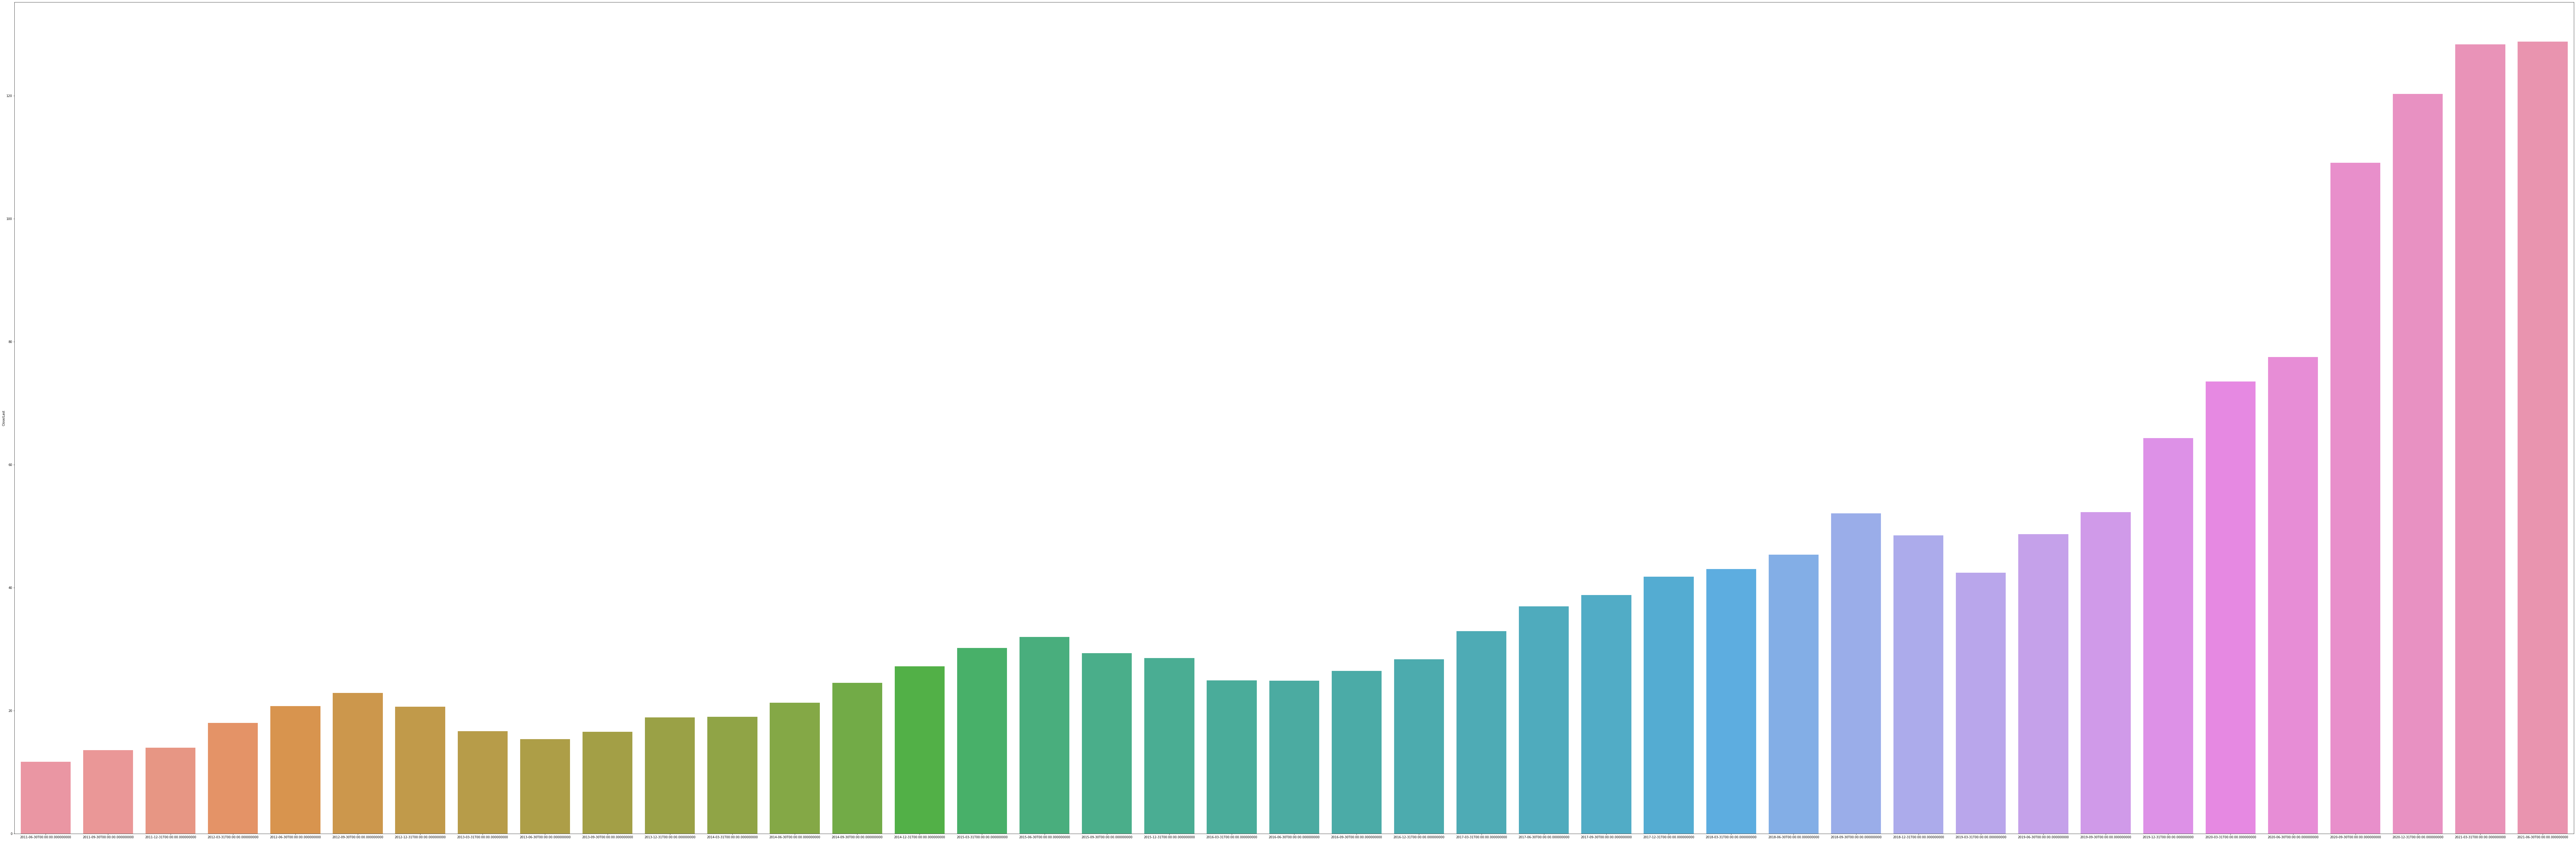

In [17]:
Quarterly_resampled_data = data["Close/Last"].resample('Q').mean()
Quarterly_resampled_data
plt.figure(figsize=(150,50))
sns.barplot(Quarterly_resampled_data.index.values,Quarterly_resampled_data)

C:\Users\sidha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Low'>

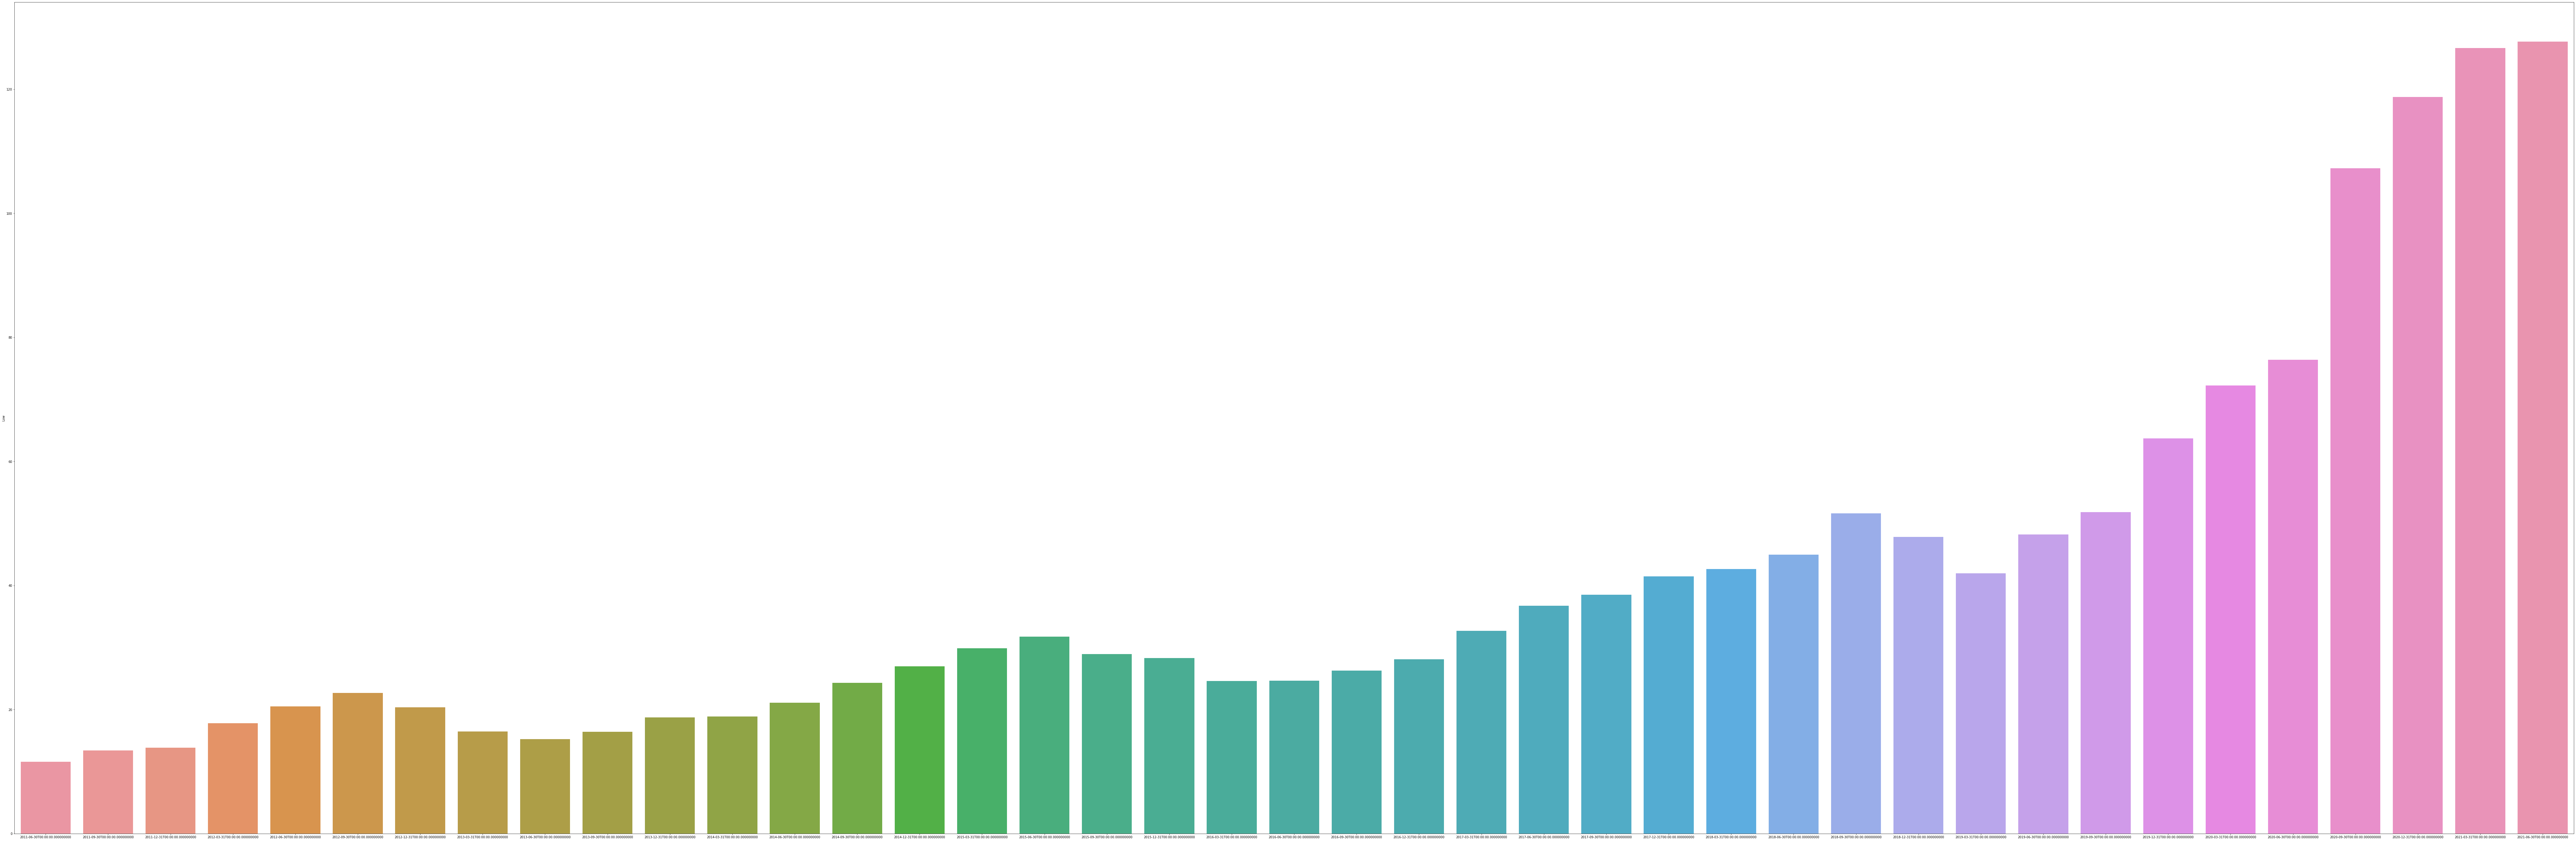

In [18]:
Quarterly_resampled_data = data.Low.resample('Q').mean()
Quarterly_resampled_data
plt.figure(figsize=(150,50))
sns.barplot(Quarterly_resampled_data.index.values,Quarterly_resampled_data)

C:\Users\sidha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='High'>

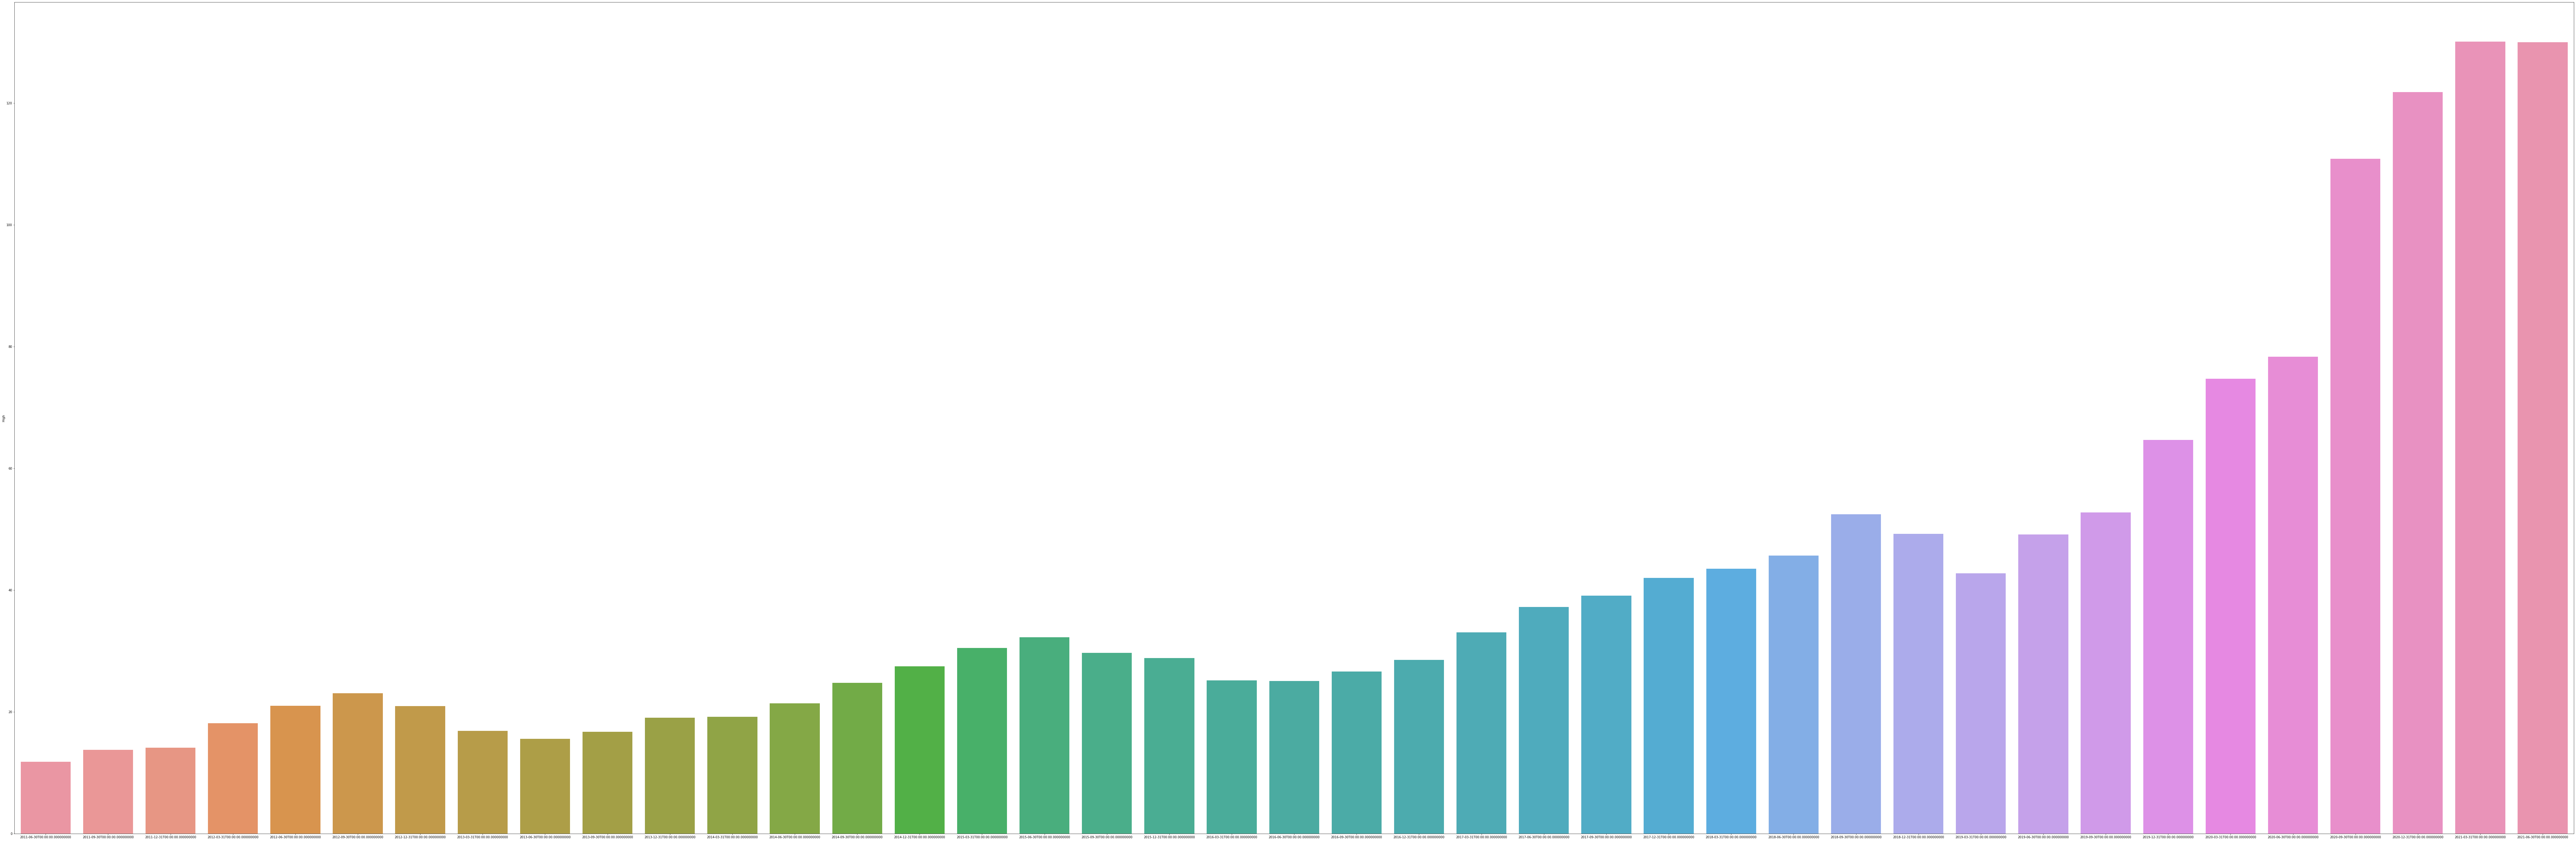

In [19]:
Quarterly_resampled_data = data.High.resample('Q').mean()
Quarterly_resampled_data
plt.figure(figsize=(150,50))
sns.barplot(Quarterly_resampled_data.index.values,Quarterly_resampled_data)

C:\Users\sidha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Volume'>

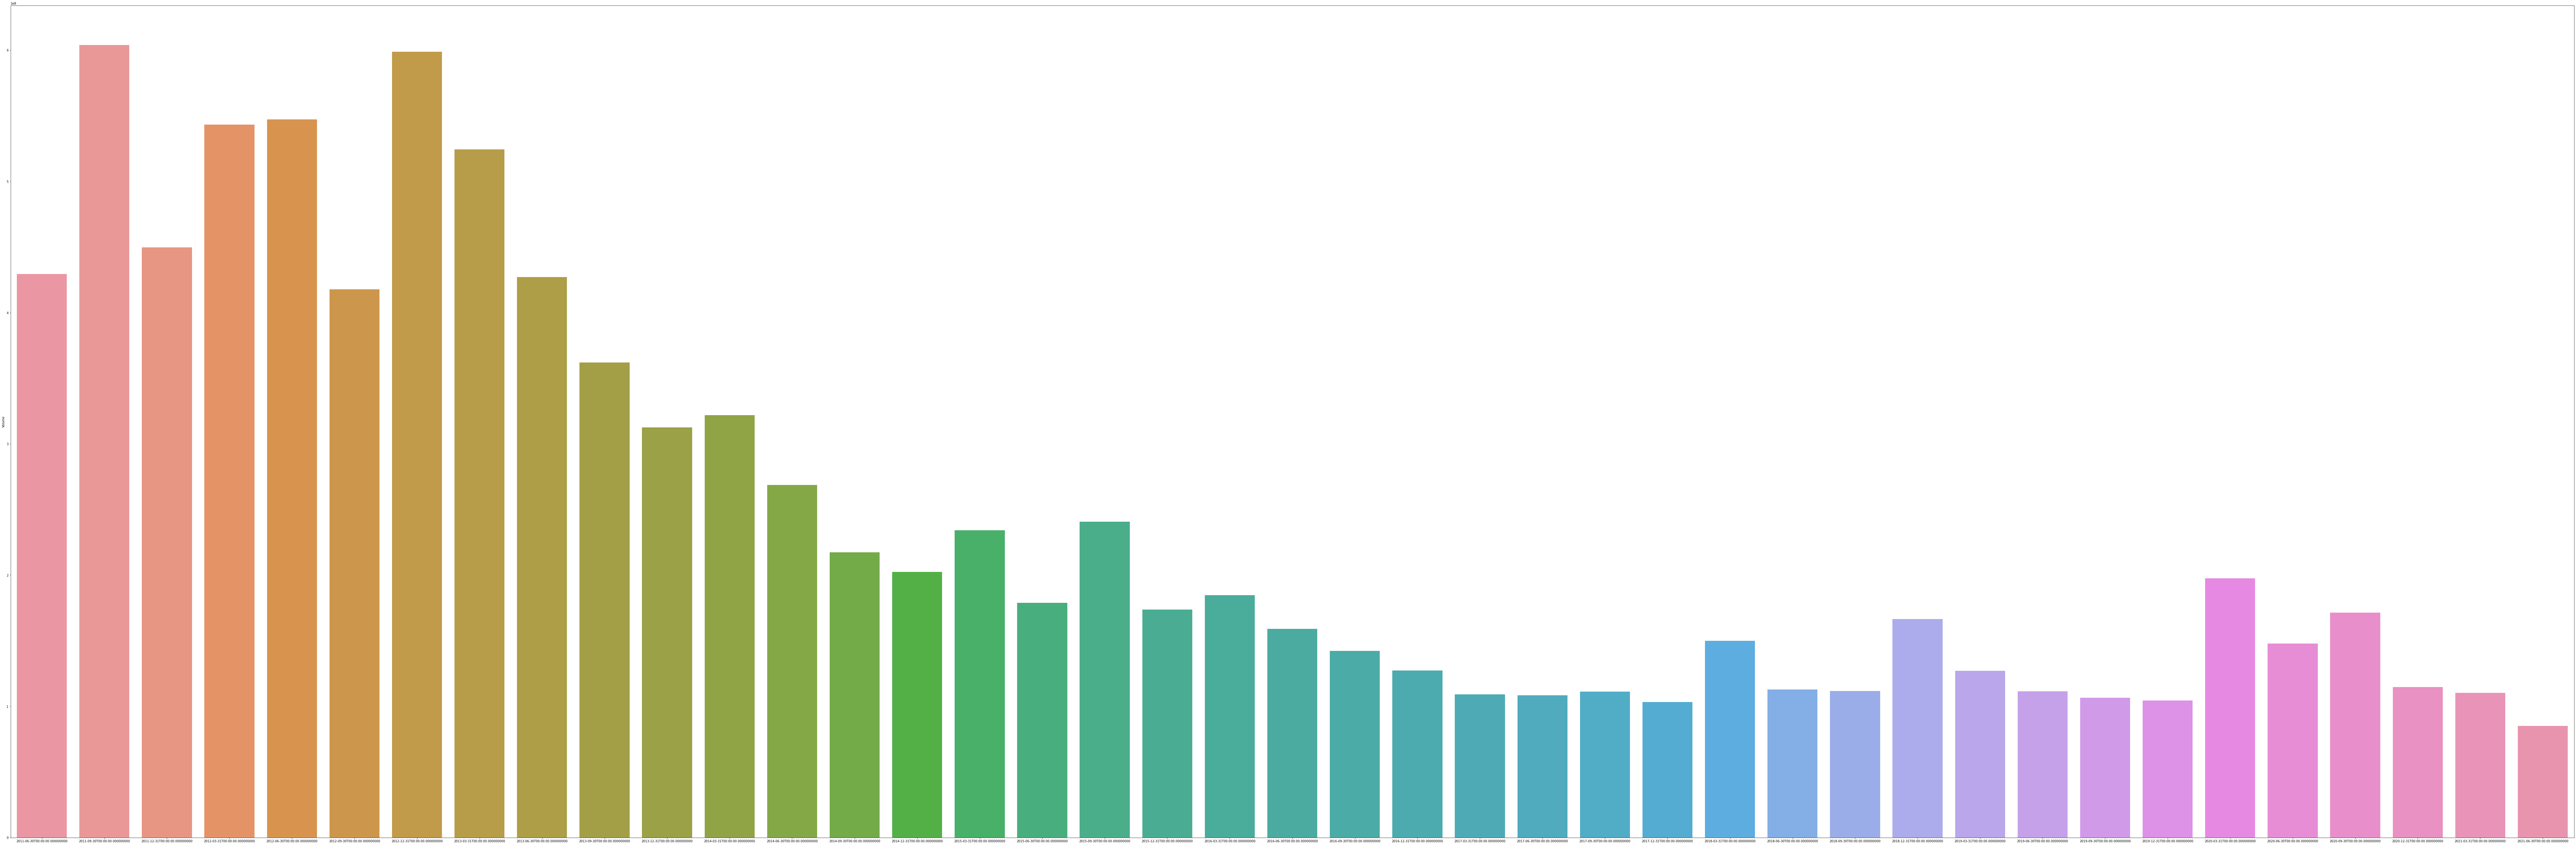

In [20]:
Quarterly_resampled_data = data.Volume.resample('Q').mean()
Quarterly_resampled_data
plt.figure(figsize=(150,50))
sns.barplot(Quarterly_resampled_data.index.values,Quarterly_resampled_data)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
scaledata = scale.fit_transform(data)
scaledata

array([[0.87846725, 0.00786835, 0.87610553, 0.87034894, 0.88601535],
       [0.87551043, 0.01993331, 0.87149444, 0.8756576 , 0.88363664],
       [0.8691419 , 0.01762974, 0.86824401, 0.85965684, 0.87305948],
       ...,
       [0.00463614, 0.19863918, 0.00359589, 0.00415272, 0.00515656],
       [0.00305462, 0.19545911, 0.00283997, 0.00283378, 0.00399368],
       [0.00286508, 0.26734623, 0.0037448 , 0.00372803, 0.00411496]])